# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True) 

In [2]:
data = pd.read_csv('train.csv') 

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# How many passengers was travelling by first class?

In [4]:
classes=data.Pclass

In [5]:
from collections import Counter
c = Counter(classes)
c

Counter({1: 216, 2: 184, 3: 491})

So, we can see that there are 216 passengers in the first class, 184 in the second class, and 491 in the third.

# What is the most popular female name on board?

In [55]:
females = data.Name[data.Sex == 'female'] 
a = females[females.str.match('.* [(].*')].str.split('[(]').str[1].str.split(' ').str[0].str.replace('\)|\"',"").value_counts() 
b = females[females.str.match('(?!.* [(].*)')].str.split('.').str[1].str.split(' ').str[1].value_counts() 
popular = a.append(b) 
popular = popular.groupby(lambda x:x).sum().sort_values(ascending = False).drop('Mrs') 
popular

Mary         15
Anna         15
Elizabeth    11
Margaret     10
Alice         6
Helen         5
Bertha        5
Maria         4
Augusta       4
Catherine     4
Ada           4
Ellen         4
Annie         4
Emily         4
Marion        4
Florence      4
Marie         4
Lillian       3
Madeleine     3
Edith         3
Elisabeth     3
Katherine     3
Jane          3
Ida           3
Hanora        3
Amelia        3
Dorothy       2
Emma          2
Jessie        2
Ethel         2
             ..
Jeannie       1
Jean          1
Jamila        1
Virginia      1
Ingeborg      1
Imanita       1
Hulda         1
Hileni        1
Hildur        1
Hilda         1
Helmina       1
Juliette      1
Karolina      1
Katie         1
Leontine      1
Lyyli         1
Lutie         1
Lulu          1
Luise         1
Lucille       1
Lilian        1
Leila         1
Katriina      1
Leah          1
Laura         1
Latifa        1
Laina         1
Kristina      1
Kornelia      1
Irene         1
Name: Name, dtype: int64

# How does ticket cost varie?

In [56]:
cost1 = data.Fare[data.Pclass == 1]
print("Ticket cost variation of 1st class", min(cost1), '\t', max(cost1), '\n')
cost2 = data.Fare[data.Pclass == 2]
print("Ticket cost variation of 2st class", min(cost2), '\t', max(cost2), '\n')
cost3 = data.Fare[data.Pclass == 3]
print("Ticket cost variation of 3st class", min(cost3), '\t', max(cost3), '\n')

Ticket cost variation of 1st class 0.0 	 512.3292 

Ticket cost variation of 2st class 0.0 	 73.5 

Ticket cost variation of 3st class 0.0 	 69.55 



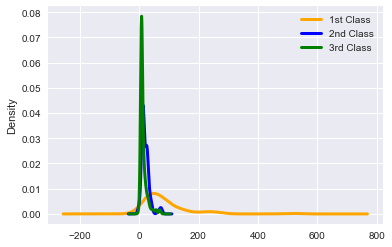

In [57]:
data['Fare'][data['Pclass'] == 1].plot(kind='kde', linewidth=3, style='orange');
data['Fare'][data['Pclass'] == 2].plot(kind='kde', linewidth=3, style='blue');
data['Fare'][data['Pclass'] == 3].plot(kind='kde', linewidth=3, style='green');
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

# What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

In [58]:
#data['Name'].head()
data['Name_Title'] = data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
data['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
the            1
Mme.           1
Don.           1
Ms.            1
Jonkheer.      1
Lady.          1
Capt.          1
Sir.           1
Name: Name_Title, dtype: int64

In [59]:
pd.crosstab(data['Name_Title'],data['Pclass'])

Pclass,1,2,3
Name_Title,,,
Capt.,1,0,0
Col.,2,0,0
Don.,1,0,0
Dr.,5,2,0
Jonkheer.,1,0,0
Lady.,1,0,0
Major.,2,0,0
Master.,3,9,28
Miss.,46,34,102


# What part of passengers was able to survive?

In [60]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [61]:
a = 342.0/(342.0+549.0)
a

0.3838383838383838

~38% of passengers was able to survive

# Are there any correlation between the number of brothers/sisters and the number of parents/kids ?

In [62]:
corrmat = data.corr()
corrmat

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


We can see that correlation coefficient between siblings and parches is quite big, so i suppose that there are exist some connections between them.

# 4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules?

In [84]:
# Set Pandas to show all columns in DataFrames
pd.set_option('display.max_columns', None)

# Set Pandas to show all rows in DataFrames
pd.set_option('display.max_rows', None)

# upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [78]:
# Setting variable to numeric value as mostly all pandas operation/method work on numeric variable
data['SURVIVED'] = pd.to_numeric(train_data['SURVIVED'], errors='coerce')
data['PCLASS'] = pd.to_numeric(train_data['PCLASS'], errors='coerce')
data['AGE'] = pd.to_numeric(train_data['AGE'], errors='coerce')
data['SIBSP'] = pd.to_numeric(train_data['SIBSP'], errors='coerce')
data['PARCH'] = pd.to_numeric(train_data['PARCH'], errors='coerce')

# Making new data set from given dataset with variables(column) which seem relevent in predicting the chance of survival
sub = data[['SURVIVED', 'PCLASS', 'AGE', 'SIBSP', 'PARCH', 'EMBARKED', 'SEX']]
#print(sub.describe())

In [79]:
# Replacing unknown age by median of 'AGE' variable
sub['AGE'] = sub['AGE'].replace(np.nan, sub['AGE'].median())

# EMBARKED variable has some missing data. So filling it with category 'S' as this has most frequency
sub['EMBARKED'] = sub['EMBARKED'].fillna('S')

# Creating new variable for better visualization of age vs survival
def AGEGROUP(row):
    if (row['AGE'] > 60) :
        return 5        
    elif (row['AGE'] > 45) :
        return 4        
    elif (row['AGE'] > 19) :
        return 3   
    elif (row['AGE'] > 9) :
        return 2 
    elif (row['AGE'] >= 0) :
        return 1    
sub['AGEGROUP'] = sub.apply(lambda row: AGEGROUP (row),axis=1) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

0    549
1    342
Name: SURVIVED, dtype: int64
0   0.616162
1   0.383838
Name: SURVIVED, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


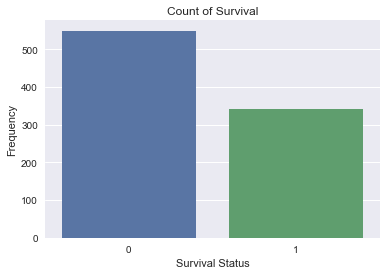

In [80]:
# Now visualization of 'SURVIVED'
# Printing counts and percentage of diffrent survival
print(sub['SURVIVED'].value_counts(sort=False))
print(sub['SURVIVED'].value_counts(sort=False,normalize=True))

# Making variable  categorical 
sub['SURVIVED'] = sub['SURVIVED'].astype('category')

# Visualising counts of survival with bar graph
sns.countplot(x="SURVIVED", data=sub);
plt.xlabel('Survival Status')
plt.ylabel('Frequency')
plt.title('Count of Survival')

# Converting 'SURVIVED' to numeric value for further operations
sub['SURVIVED'] = pd.to_numeric(sub['SURVIVED'], errors='coerce')

1     62
2    102
3    624
4     81
5     22
Name: AGEGROUP, dtype: int64
1   0.069585
2   0.114478
3   0.700337
4   0.090909
5   0.024691
Name: AGEGROUP, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


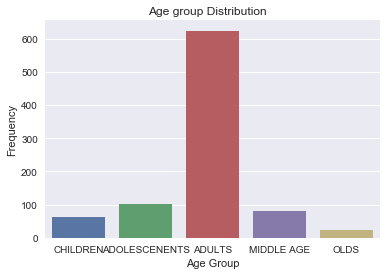

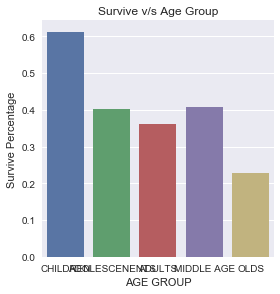

In [81]:
# Printing counts and percentage of category of Age Group
print(sub['AGEGROUP'].value_counts(sort=False))
print(sub['AGEGROUP'].value_counts(sort=False,normalize=True))

# Making variable AGEGROUP categorical and naming category
sub['AGEGROUP'] = sub['AGEGROUP'].astype('category')
sub['AGEGROUP'] = sub['AGEGROUP'].cat.rename_categories(["CHILDREN", "ADOLESCENENTS", "ADULTS", "MIDDLE AGE", "OLDS"])

# Visualising counts of Age Group with bar graph
sns.countplot(x="AGEGROUP", data=sub);
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age group Distribution   ')

# Showing proportion of survival of different groups by plot
sns.factorplot(x="AGEGROUP", y="SURVIVED", data=sub, kind="bar", ci=None)
plt.xlabel('AGE GROUP')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Age Group')

50% of passenger are in adult category(20 - 45 years). 7% of passengers are children(0 - 9 years) out of which 60% has survived while 2.5% of passenger are old( more 60 years) of which only 20% survived.

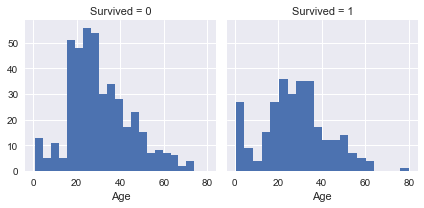

In [23]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

From the histogram, it seems that kids with very young age have a respectively higher survival rate, and elder people have a respectively lower survival rate.

# 5. Check the following assumptions:
Females survived more frequently than mens

In [10]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Passangers with more expensive tickets survived with higher probability

In [21]:
data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363
